Note that, LDDIM = CDM, DDIM = CDM-nolocal

In [1]:
import sys
sys.path.append("../mypkg")

In [2]:
from constants import RES_ROOT, FIG_ROOT, DATA_ROOT, MID_ROOT
from utils.misc import load_pkl, save_pkl, merge_intervals
from utils.colors import qual_cmap
from utils.stats import weighted_quantile

In [3]:
%load_ext autoreload
%autoreload 2
# 0,1, 2, 3, be careful about the space

In [4]:
import torch
import scipy.stats as ss
import numpy as np
from easydict import EasyDict as edict
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict as ddict
from tqdm import tqdm, trange
import random
from joblib import Parallel, delayed
import pandas as pd
from pprint import pprint
plt.style.use(FIG_ROOT/"base.mplstyle")

In [5]:
pd.set_option('display.float_format', '{:.3f}'.format)

In [7]:
setting = "setting7"
d = 100
cs = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1.2]

[0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1.2]

In [16]:
fils = list(MID_ROOT.glob(f"*d{d}_lcpw0.pkl"));
dfs = []
for fil in fils: 
    setting = fil.stem.split("_")[1] 
    if int(setting[-1]) < 5:
        continue
    df =  load_pkl(fil)
    df["setting"] = setting
    dfs.append(df)

Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../mid_results/tmpdf_setting5_d300_lcpw0.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../mid_results/tmpdf_setting6_d300_lcpw0.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../mid_results/tmpdf_setting7_d300_lcpw0.pkl
Load file /data/rajlab1/user_data/jin/MyResearch/DG-CITE_paper/notebooks/../mypkg/../mid_results/tmpdf_setting8_d300_lcpw0.pkl


In [17]:
method_order=["LDDIM", "DDIM", "MLP", "CQR", "naive", "CF"]
noises = ["Normal", "Gamma", "Nonlocal"];

all_df = pd.concat(dfs);
all_df["noise"] = all_df["setting"].map(lambda x: noises[int(x[-1])-5])
np.unique(all_df["data_set"])

array(['all_data', 'set1', 'set2'], dtype=object)

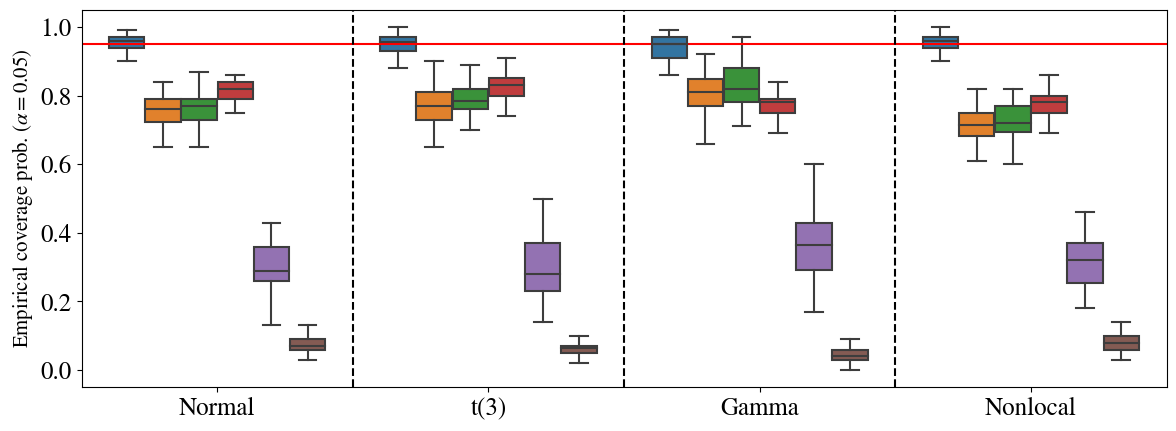

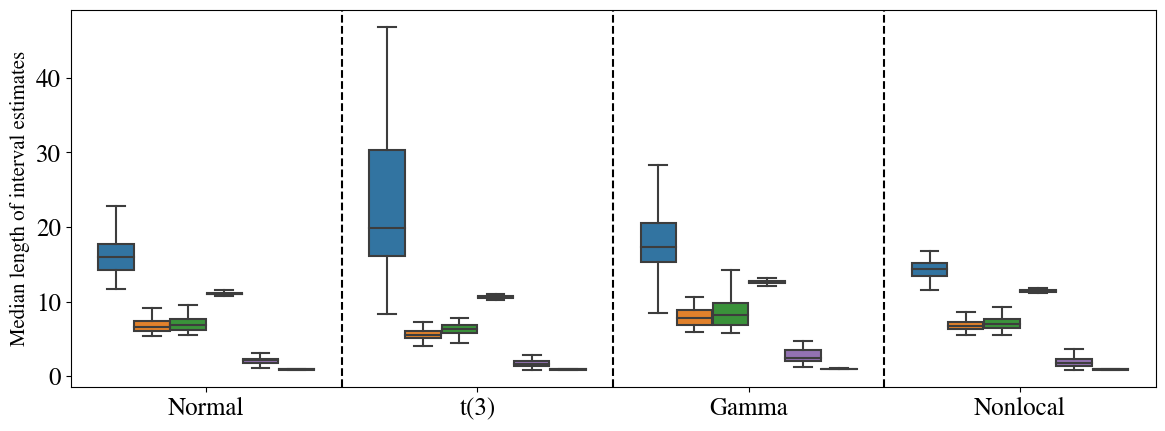

In [20]:
data_set = "set1" 

plt.figure(figsize=[14, 5])
sns.boxplot(data=all_df[all_df["data_set"]==data_set], 
            y="ITE", hue="method_raw", x="noise", 
            showfliers=False,
            hue_order=method_order, orient='v')
plt.axhline(y=0.95, color="red");
for s_ix in range(2):
    plt.axvline(x=s_ix+0.5, color="black", ls="--")
plt.xlabel('')
plt.ylabel(r"Empirical coverage prob. ($\alpha=0.05$)", fontsize=15)
#plt.legend([],[], frameon=False)
plt.xticks(np.arange(3), noises);
plt.savefig(FIG_ROOT/f"hetero_d{d}_{data_set}_prob.jpg")


plt.figure(figsize=[14, 5])
sns.boxplot(data=all_df[all_df["data_set"]==data_set], y="Len", 
            hue="method_raw", x="noise", 
            showfliers=False,
            order=noises,
            hue_order=method_order, orient='v')
for s_ix in range(2):
    plt.axvline(x=s_ix+0.5, color="black", ls="--")
plt.xlabel('')
plt.ylabel("Median length of interval estimates", fontsize=15)
#plt.legend([],[], frameon=False)
plt.xticks(np.arange(3), noises);
plt.savefig(FIG_ROOT/f"hetero_d{d}_{data_set}_len.jpg")